In [100]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib
def nested_dict(n, type):
    if n==1:
        defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))

In [101]:
data = nested_dict(4, list)
z_all= [100, 50, 10, 6, 1, 0.5, 0]

for z in z_all:
    index = z_all.index(z);
    data['phi']['lcdm_ref']['z='+str(z)] = np.loadtxt("./References/lcdm_output/pk00"+str(index)+"_phi.dat")
    data['delta']['lcdm_ref']['z='+str(z)] = np.loadtxt("./References/lcdm_output/pk00"+str(index)+"_delta.dat")
    
    data['phi']['lcdm']['z='+str(z)] = np.loadtxt("./../output///pk00"+str(index)+"_phi.dat")
    data['delta']['lcdm']['z='+str(z)] = np.loadtxt("./../output//pk00"+str(index)+"_delta.dat")


## Plots:

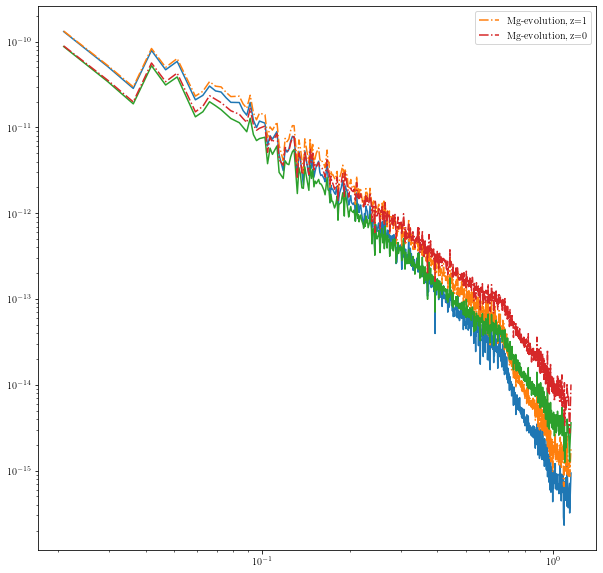

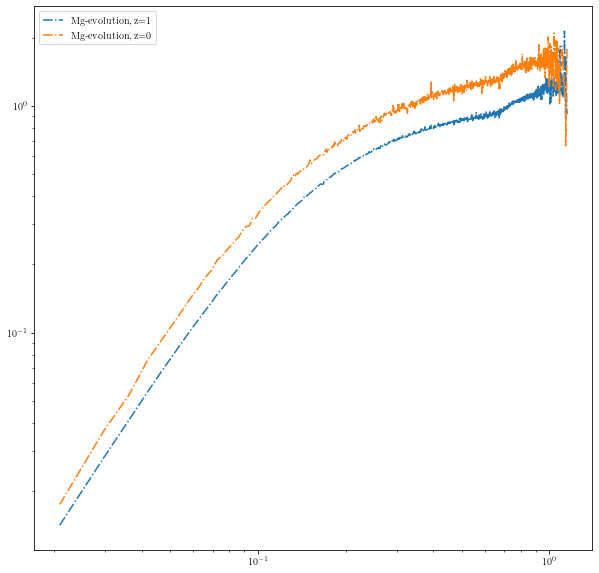

In [108]:
fig = plt.figure(figsize=(10,10))
for z in [1, 0]:
    k = data['phi']['lcdm_ref']['z='+str(z)][:,0]
    pk_ref = data['phi']['lcdm_ref']['z='+str(z)][:,1]
    plt.loglog(k, pk_ref, "-")
    ###
    k = data['phi']['lcdm']['z='+str(z)][:,0]
    pk = data['phi']['lcdm']['z='+str(z)][:,1]
    plt.loglog(k, np.abs(pk) , "-." ,label="Mg-evolution, z="+str(z))
    
plt.legend()

fig = plt.figure(figsize=(10,10))
for z in [1, 0]:
    k = data['phi']['lcdm_ref']['z='+str(z)][:,0]
    pk_ref = data['phi']['lcdm_ref']['z='+str(z)][:,1]
    ###
    k = data['phi']['lcdm']['z='+str(z)][:,0]
    pk = data['phi']['lcdm']['z='+str(z)][:,1]
    plt.loglog(k, np.abs(pk-pk_ref)/pk_ref , "-." ,label="Mg-evolution, z="+str(z))
    
plt.legend()

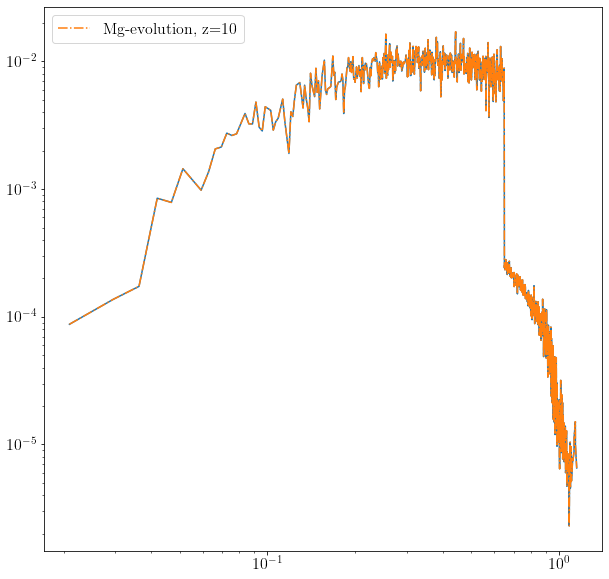

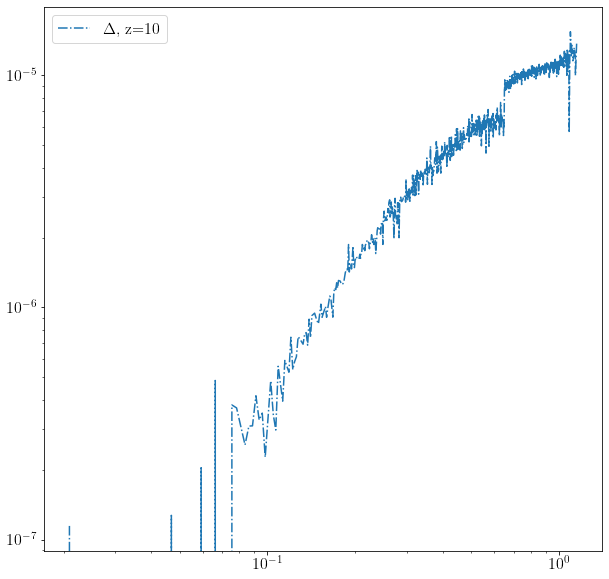

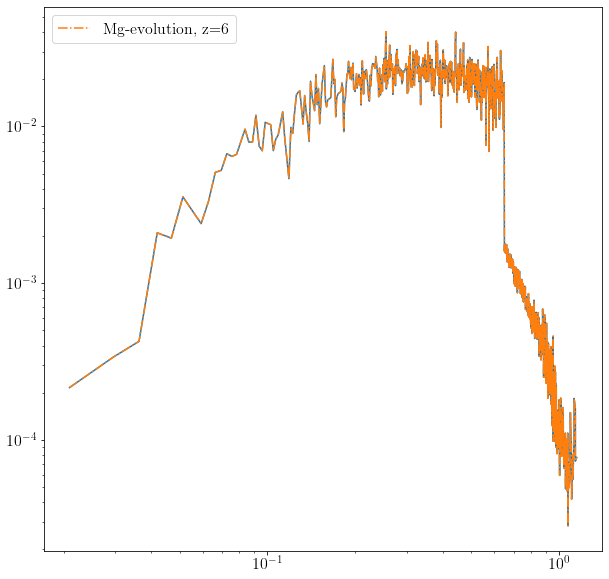

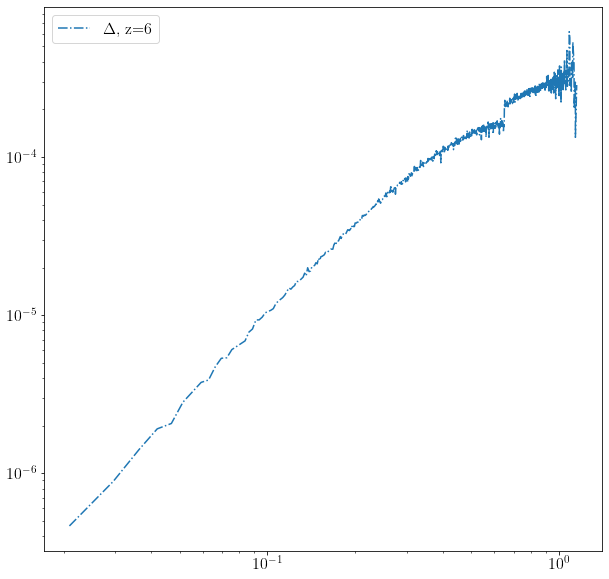

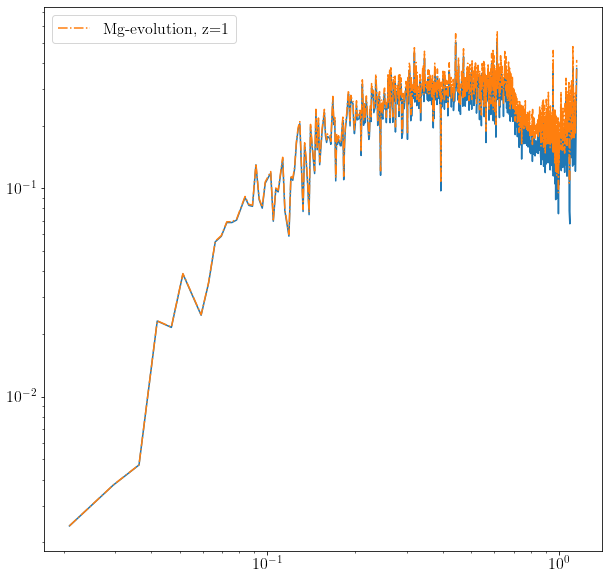

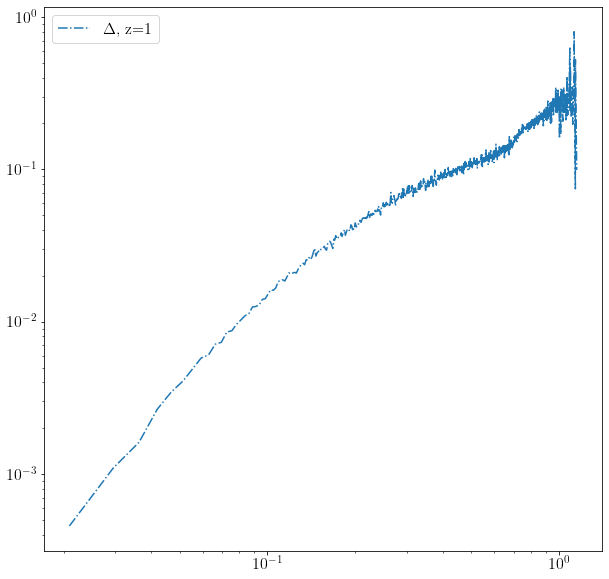

In [117]:
plt.rcParams['font.size'] = 16

for z in [10,6,1]:
    fig = plt.figure(figsize=(10,10))
    k = data['delta']['lcdm_ref']['z='+str(z)][:,0]
    pk_ref = data['delta']['lcdm_ref']['z='+str(z)][:,1]
    plt.loglog(k, pk_ref, "-")
    ###
    k = data['delta']['lcdm']['z='+str(z)][:,0]
    pk = data['delta']['lcdm']['z='+str(z)][:,1]
    plt.loglog(k, pk , "-." ,label="Mg-evolution, z="+str(z))
    plt.legend()

    fig = plt.figure(figsize=(10,10))
    k = data['delta']['lcdm_ref']['z='+str(z)][:,0]
    pk_ref = data['delta']['lcdm_ref']['z='+str(z)][:,1]
    ###
    k = data['delta']['lcdm']['z='+str(z)][:,0]
    pk = data['delta']['lcdm']['z='+str(z)][:,1]
    plt.loglog(k, np.abs(pk-pk_ref)/pk_ref , "-." ,label=r"$\Delta$, z="+str(z))
    
    plt.legend()